In [2]:
import os
import pandas as pd
import numpy as np
from skimage.morphology import label
from skimage.io import imread
import matplotlib.pyplot as plt


In [3]:
# Used absolute path must be changed to reimplement
data_path = 'D:\\rabohii stol\\airbus-ship-detection'
train_data_path = os.path.join(data_path, 'train_v2')
test_data_path = os.path.join(data_path, 'test_v2')

In [4]:
# Used absolute path must be changed to reimplement
masks = pd.read_csv(os.path.join(data_path, 'train_ship_segmentations_v2.csv'))

In [5]:
masks.head()



,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


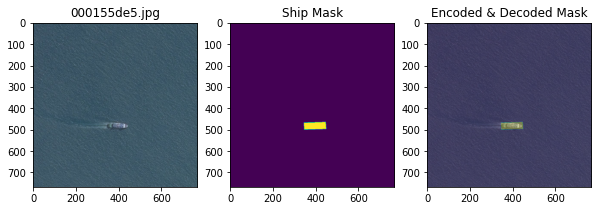

000155de5.jpg  Check Decoding->Encoding RLE_0: 1 -> RLE_1: 1


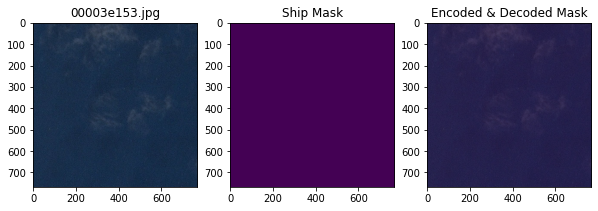

00003e153.jpg  Check Decoding->Encoding RLE_0: 1 -> RLE_1: 0
It could be different when there is no mask.


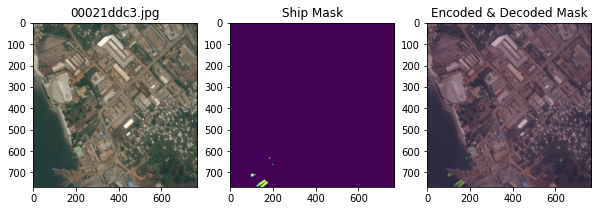

00021ddc3.jpg  Check Decoding->Encoding RLE_0: 9 -> RLE_1: 4
It could be different when there are masks overlapped.


In [10]:
from utils import multi_rle_encode, masks_as_image

def shows_decode_encode(image_id, path=train_data_path):
    '''Show image, ship mask, and encoded/decoded result
    '''
    fig, axarr = plt.subplots(1, 3, figsize = (10, 5))
    # image
    img_0 = imread(os.path.join(path, image_id))
    axarr[0].imshow(img_0)
    axarr[0].set_title(image_id)
    
    # input mask
    rle_1 = masks.query('ImageId=="{}"'.format(image_id))['EncodedPixels']
    img_1 = masks_as_image(rle_1)
    # takes 2d array (shape.h, sahpe.w)
    axarr[1].imshow(img_1[:, :, 0])
    axarr[1].set_title('Ship Mask')
    
    # encode & decode mask 
    rle_2 = multi_rle_encode(img_1)
    img_2 = masks_as_image(rle_2)
    axarr[2].imshow(img_0)
    axarr[2].imshow(img_2[:, :, 0], alpha=0.3)
    axarr[2].set_title('Encoded & Decoded Mask')
    plt.show()
    print(image_id , ' Check Decoding->Encoding',
          'RLE_0:', len(rle_1), '->',
          'RLE_1:', len(rle_2))

# inspects a few example
shows_decode_encode('000155de5.jpg')
shows_decode_encode('00003e153.jpg')
print('It could be different when there is no mask.')
shows_decode_encode('00021ddc3.jpg')
print('It could be different when there are masks overlapped.')
